In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
from scipy.optimize import curve_fit

In [2]:
stress = np.array([0.0050304, 0.0102, 0.0157, 0.021, 0.0262, 0.104, 0.133, 0.161, 0.194, 0.223, 0.361, 0.512, 0.694])
strain = np.array([0.0164, 0.0293, 0.0425, 0.0551, 0.0694, 0.161, 0.167, 0.172, 0.175, 0.180, 0.191, 0.202, 0.210])

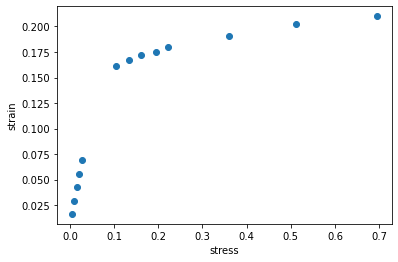

In [3]:
plt.scatter(stress, strain)
plt.xlabel("stress")
plt.ylabel("strain")
plt.show()

In [4]:
def func(x, e, e0, o0, n):
    return (x/e)+e0*np.power((x/o0), n)

In [9]:
popt1, pcov1 = curve_fit(func, stress, strain, 
                         bounds=(0.001, [1000, 10, 1000, 15]), method='trf')
popt1

array([  2.19798672,   5.0005    , 500.0005    ,   7.5005    ])

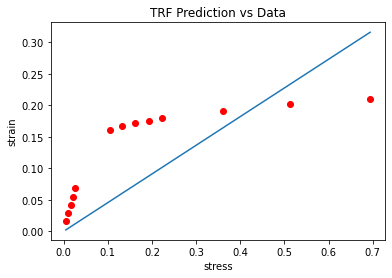

In [10]:
plt.scatter(stress, strain, color="red", label = "data")
plt.plot(stress, func(stress, *popt1), label = 'trf prediction')
plt.title("TRF Prediction vs Data")
plt.xlabel("stress")
plt.ylabel("strain")
plt.show()

In [11]:
popt2, pcov2 = curve_fit(func, stress, strain, bounds=(0.001, [10000, 1, 100, 5]), method='dogbox')
popt2

array([5.03132835e+03, 6.63760940e-01, 1.35004868e+01, 3.41147305e-01])

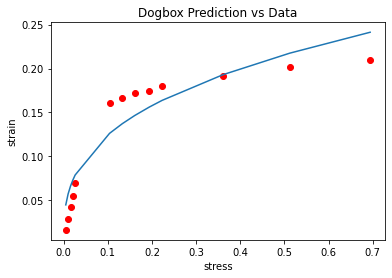

In [12]:
plt.scatter(stress, strain, color="red")
plt.plot(stress, func(stress, *popt2))
plt.title("Dogbox Prediction vs Data")
plt.xlabel("stress")
plt.ylabel("strain")
plt.show()

In [13]:
pcov1

array([[0.17332918, 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        ]])

In [14]:
pcov2

array([[ 2.10062604e+13, -3.22130803e+12, -1.92056234e+14,
         6.32324283e+05],
       [-3.22130803e+12,  4.76579049e+12,  2.84138958e+14,
        -1.08905445e+05],
       [-1.92056234e+14,  2.84138958e+14,  1.69405155e+16,
        -6.49300503e+06],
       [ 6.32324283e+05, -1.08905445e+05, -6.49300503e+06,
         2.19259079e-02]])

In [15]:
xpred1 = func(stress, *popt1)
xpred2 = func(stress, *popt2)

Text(0, 0.5, 'strain')

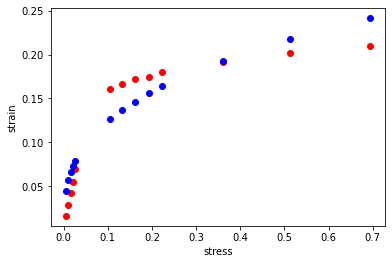

In [16]:
plt.scatter(stress, strain, color="red", label = "data")
plt.scatter(stress, xpred2, color = "blue", label = "trf prediction")
plt.xlabel("stress")
plt.ylabel("strain")
#plt.scatter(stress, xpred2, color = "green")

The predictions are so painfully close that you can't even see them seperately because they overlay each other, so we'll have to figure out which one is better using something quantitative like sum of squared differences.

In [17]:
np.sum(np.square(strain - xpred1))

0.06799917571717716

In [18]:
np.sum(np.square(strain - xpred2))

0.007149133267659982